In [149]:
import pandas as pd

df = pd.read_csv('https://proai-datasets.s3.eu-west-3.amazonaws.com/housing.csv')
print(df.shape)
print(df.describe())
print(df.info())
df.head()

(545, 13)
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

         mainroad   guestroom    basement  hotwaterheating  airconditioning  \
count  545.000000  545.000000  545.000000       545.000000       545.000000   
mean     0.858716    0.177982    0.350459         0.045872         0.315596   
std      0.348635    0.382849    0.477552         0.209399         0.465180   
min      0.00000

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'mainroad'}>,
        <Axes: title={'center': 'guestroom'}>,
        <Axes: title={'center': 'basement'}>],
       [<Axes: title={'center': 'hotwaterheating'}>,
        <Axes: title={'center': 'airconditioning'}>,
        <Axes: title={'center': 'parking'}>,
        <Axes: title={'center': 'prefarea'}>],
       [<Axes: title={'center': 'furnishingstatus'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

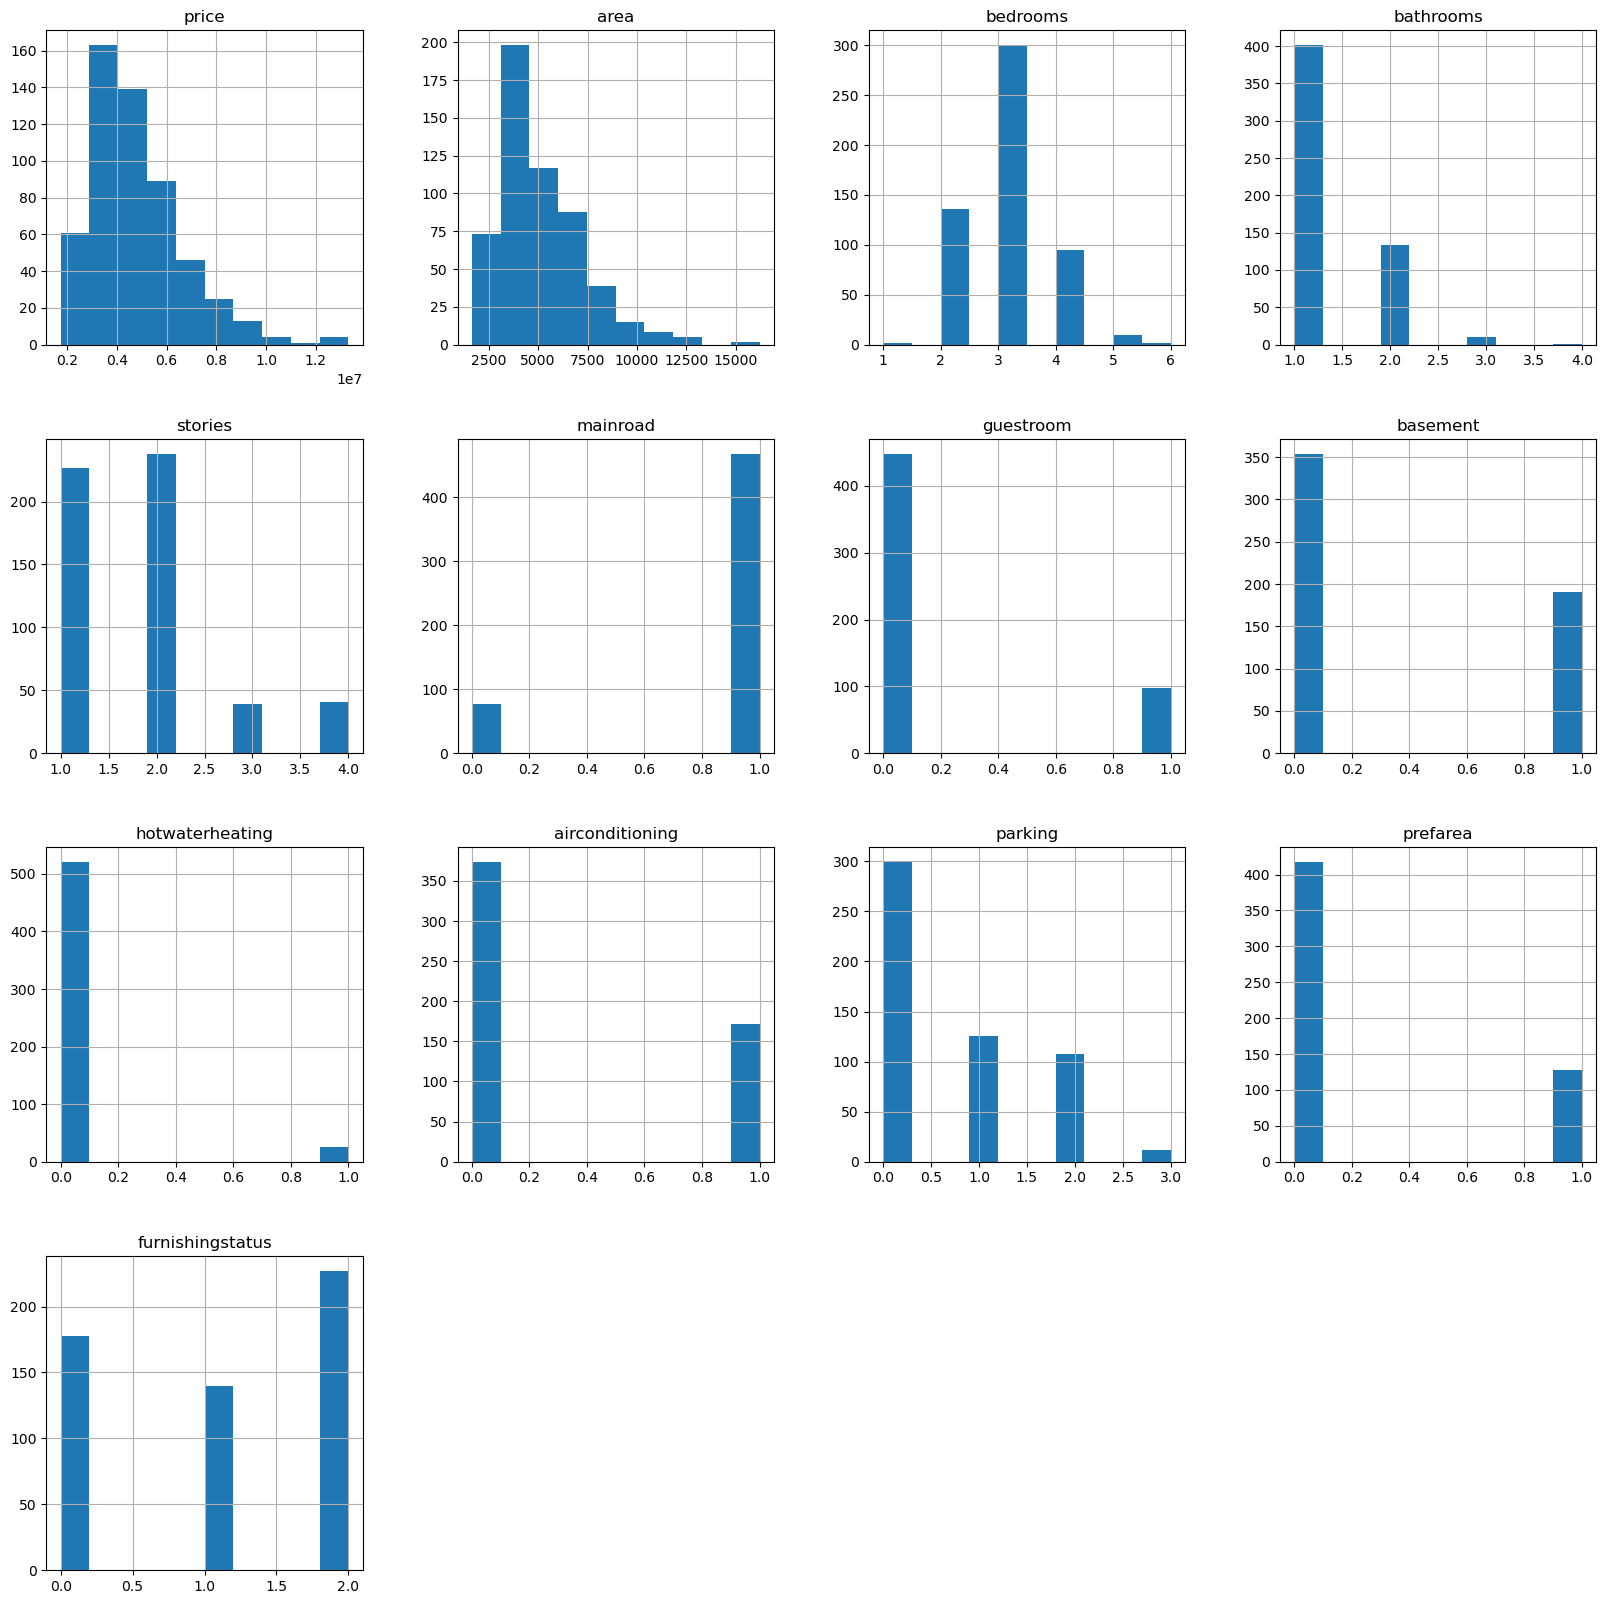

In [29]:
df.hist(figsize=(20,20))

Ho creato il dataframe dal file csv "housing.csv". Analizzando il contenuto si può notare che non ci sono valori mancanti e i valori nelle rispettive colonne non necessitano di codifica.

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

def evalutate_model(model, dataset):
    X, y = dataset
    y_pred = model.predict(X)
    print(f"MSE: {mean_squared_error(y, y_pred):.3f}")
    print(f"R2: {r2_score(y, y_pred):.3f}")

Questa funzione consente di valutare il modello, andando a stampare il valore di mean square error e r2.

In [11]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Creazione del dataset di training e di test per addestrare i modelli.

In [13]:
model_ridge = Ridge(alpha=1.)
model_ridge.fit(X_train, y_train)
evalutate_model(model_ridge, (X_test, y_test))

MSE: 1098229410083.554
R2: 0.663


Creazione del modello di regolarizzazione Ridge.

In [15]:
model_lasso = Lasso(alpha=1.)
model_lasso.fit(X_train, y_train)
evalutate_model(model_lasso, (X_test, y_test))

MSE: 1098652908035.645
R2: 0.663


Creazione del modello di regolarizzazione Lasso.

In [17]:
model_elastic_net = ElasticNet(alpha=1., l1_ratio=.5)
model_elastic_net.fit(X_train, y_train)
evalutate_model(model_elastic_net, (X_test, y_test))

MSE: 1140209107647.171
R2: 0.650


Creazione del modello di regolarizzazione ElasticNet.

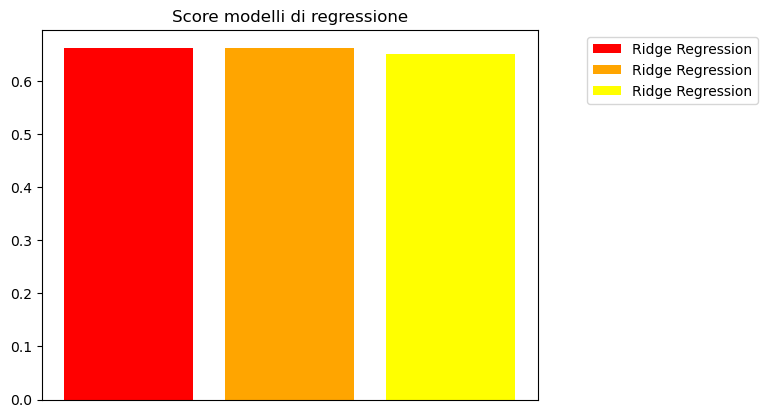

In [147]:
import matplotlib.pyplot as plt

plt.bar(0, model_ridge.score(X_test, y_test), label="Ridge Regression", color="red")
plt.bar(1, model_lasso.score(X_test, y_test), label="Ridge Regression", color="orange")
plt.bar(2, model_elastic_net.score(X_test, y_test), label="Ridge Regression", color="yellow")
plt.xticks([])
plt.title("Score modelli di regressione")
plt.legend(loc=(1.1, 0.8))
plt.show() 

Come possiamo notare i 3 modelli di regressione hanno uno score quasi identico, quindi si equivalgono.

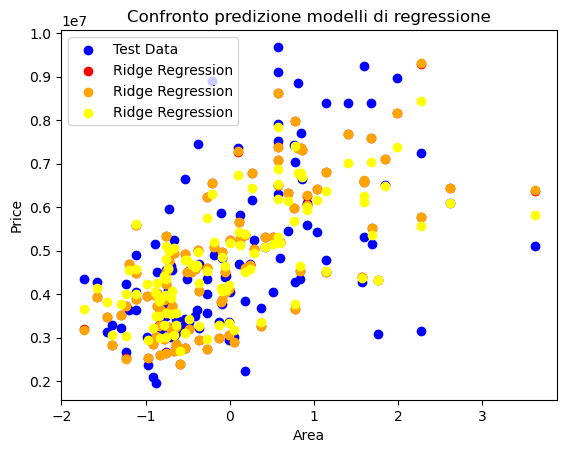

In [145]:
plt.scatter(X_test[:,0], y_test, label='Test Data', c="blue")
plt.scatter(X_test[:,0], model_ridge.predict(X_test), label='Ridge Regression', c="red")
plt.scatter(X_test[:,0], model_lasso.predict(X_test), label='Ridge Regression', c="orange")
plt.scatter(X_test[:,0], model_elastic_net.predict(X_test), label='Ridge Regression', c="yellow")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Confronto predizione modelli di regressione')
plt.legend()
plt.show()

### Conclusioni

L'analisi comparativa tra i modelli di regressione Lasso, Ridge ed Elastic Net ha evidenziato le peculiarità e le performance di ciascuna tecnica nell'applicare la regolarizzazione ai nostri dati.
Sulla base delle metriche di valutazione considerate MSE e R2, possiamo affermare che il modello con regolarizzazione Ridge è migliore rispetto agli altri, ma non sufficentemente accurato da dare delle previsioni prive di errore.